In [ ]:
import pandas as pd
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import os
import random

In [ ]:
# mount to google drive to access csv located in my google drive
#drive.mount('/content/drive/')
#os.getcwd()
#os.chdir('drive/MyDrive/GradSchool/')

### [EXERCISE:] How does the Guess Who coding exercise connect with ML concepts? Share your short take on this in your Google Colab.




*   First of all, getting more comfortable using python
*   Learning how data is encoded into features that can be classified. For example, dealing with different types of data in the same dataset (categorical, numerical, binary)
*  Learning to think of data as collections of vectors where each vector holds information about a specific feature of the data
*   Learning to take concepts from a game and relate them to ML concepts (logical statements, optimizing a question based on the data, etc.)






### [EXERCISE] → Import the spreadsheet of names and features into your Google Colab as a dataframe with the Pandas library

In [ ]:
# Load the data and preview it
df = pd.read_excel('CHEM_269/Guess_Who_Features.xlsx')
df.set_index('Feature', inplace=True)
df.head()
#df.shape #68 rows (features), 65 columns(people)

,Adrian_Jinich,Nate_Roethler,Rocky,Nate,Julia,Derek,Ariel,Sierra,Christie,Karry,...,Shirley,Megha,Felipe,Aaryan,Mayuna,Joshua R,Thompson,Miranda,Diana,Caxton
Feature,,,,,,,,,,,,,,,,,,,,,
wears glasses,1,0,0,NaN,0,0,0,0,0,1,...,1,0,1,1,1.0,1,1,1,0,0
runs for exercise,0,0,1,NaN,1,0,0,1,1,0,...,0,1,0,0,1.0,1,0,0,1,0
number of siblings,1,2,1,NaN,2,2,2,5,3,0,...,1,1,2,1,NaN,9,2,1,4,0
likes ice cream,1,1,1,NaN,1,0,1,1,1,1,...,1,1,1,1,NaN,1,1,1,1,1
brown eyes,1,1,1,NaN,1,1,1,0,1,0,...,1,1,1,1,NaN,0,1,1,1,0


### [EXERCISE] → Store all the names of the students in the dataframe in a “list” and show / print out all the names in the list. Then pick a random name from the list of names.


In [ ]:
#transpose the dataframe so i can more easily access the names
df_transposed = df.transpose()
#make a list of students and print it
students = list(df_transposed.index)
print(students)
#choose random name and print it
random_name = random.choice(students)
print(random_name)

#prints a list of all the features
features = df.index.tolist()
print(features)

['Adrian_Jinich', 'Nate_Roethler', 'Rocky', 'Nate', 'Julia', 'Derek', 'Ariel', 'Sierra', 'Christie', 'Karry', 'Katharine', 'Josh', 'Ryan', 'Nathan', 'Abhijit', 'Josh Lim', 'Shivali', 'Luka', 'Mohit', 'Luis', 'Demi', 'Clare', 'Javier', 'Santino', 'Anna', 'Shay', 'Tristan', 'Sarah', 'Davis', 'Czar', 'Francisco', 'Audrey', 'Colleen', 'Nick', 'Jesse', 'Sarah Lin', 'Jazlyn', 'Amy', 'Doug', 'Andrea', 'Esther', 'Zoe', 'Merchel', 'Woojung', 'Srikar', 'Ali', 'Nivhi', 'Daniel', 'Eugene', 'Soumya', 'Alma', 'Leyi', 'Jiaqi', 'Adesh', 'Juan', 'Shirley', 'Megha', 'Felipe', 'Aaryan', 'Mayuna', 'Joshua R', 'Thompson', 'Miranda', 'Diana', 'Caxton']
Nivhi
['wears glasses', 'runs for exercise', 'number of siblings', 'likes ice cream', 'brown eyes', 'undergraduate student', 'graduate student', 'has seen The New Dog Man Movie', "less than 6'", 'has a mac laptop', 'introvert', 'can catch very well?', 'can throw very well?', 'likes to swim', 'watched Wicked', 'Long Hair', 'Snowboards', 'Likes Working on Cars'

### [EXERCISE] → Once you loaded your dataframe, with the chatbot or expert human bot coding buddy, learn how to transpose a dataframe (flip the rows-to-columns and viceversa.)

In [ ]:
#before transposing, want to remove columns missing any values
df = df.dropna(axis=1, how='any')
#taking original dataframe, transpose by making the names the first column and the features into the row headers aka each feature is a column
df_transposed = df.transpose()
df_transposed.shape # 60 people, 68 feature cols


(60, 68)

In [ ]:
print(df_transposed.loc['Clare','brown eyes'])

1


### [EXERCISE: EXTRA POWERFUL EXTRA FUN] → turn the dataset into a "tidy" long format dataframe

In [ ]:
df_tidy = pd.melt(df.reset_index(), id_vars='Feature', var_name = 'Name', value_name='Value')
df_tidy

,Feature,Name,Value
0,wears glasses,Adrian_Jinich,1
1,runs for exercise,Adrian_Jinich,0
2,number of siblings,Adrian_Jinich,1
3,likes ice cream,Adrian_Jinich,1
4,brown eyes,Adrian_Jinich,1
...,...,...,...
4075,wants to work in industry,Caxton,0
4076,number of types of pets owned?,Caxton,3
4077,tolerance to sweetness (1-5),Caxton,3
4078,favorite video game console,Caxton,steam


### [EXERCISE] → Can you find the Names of people who are missing data? Can you rank them by who is missing the most data?

In [ ]:
# figure out how many values each person is missing
missing_data_perperson = df.isnull().sum()

#sort from large to small
sorted_missingdata = missing_data_perperson.sort_values(ascending=True)
sorted_missingdata.head(7)

,0
Adrian_Jinich,0
Jesse,0
Sarah Lin,0
Jazlyn,0
Amy,0
Doug,0
Andrea,0


### [EXERCISE] If there's people who didn't fill out the spreadsheet, learn how to discard those names/columns

In [ ]:
#remove vectors(people) with any emtpy values, this removed 5 columns (5 people)
df_no_nan = df.dropna(axis=1, how='any')
df.shape, df_no_nan.shape #dropping nan columns removed 5 people

((68, 60), (68, 60))

### [EXERCISE] → Learn to get the vector of features for a single person in your notebook. That is, if you’re interested in Person_XYZ’s vector of data that we collected, how do you get that?
this also hits storing everyones names as a list


In [ ]:
#print my own vector using the original dataframe
print(df.loc[:,'Clare'])

Feature
wears glasses                        0
runs for exercise                    1
number of siblings                   0
likes ice cream                      1
brown eyes                           1
                                  ... 
wants to work in industry            1
number of types of pets owned?       1
tolerance to sweetness (1-5)         2
favorite video game console       none
are you nice?                      yes
Name: Clare, Length: 68, dtype: object


### [EXERCISE] → What about the other way around. How do you get the data of everyone for a single feature? Like if I want to get all the answers to one of the features / questions (e.g. brown hair?). Learn how to do that.

In [ ]:
#print everyones answer to 'brown eyes' feature
print(df_transposed['brown eyes'])

Adrian_Jinich    1
Nate_Roethler    1
Rocky            1
Julia            1
Derek            1
Ariel            1
Sierra           0
Christie         1
Karry            0
Katharine        1
Josh             1
Ryan             1
Nathan           1
Abhijit          1
Josh Lim         0
Shivali          1
Luka             0
Mohit            0
Luis             0
Demi             1
Clare            1
Javier           1
Santino          1
Anna             0
Shay             1
Tristan          1
Sarah            1
Davis            0
Francisco        1
Audrey           1
Colleen          1
Nick             0
Jesse            1
Sarah Lin        1
Jazlyn           1
Amy              1
Doug             1
Andrea           1
Esther           1
Zoe              1
Merchel          1
Woojung          1
Srikar           1
Ali              1
Eugene           0
Soumya           1
Alma             1
Leyi             0
Jiaqi            1
Adesh            1
Juan             1
Shirley          1
Megha       

### Filtering different types of data: binary, numerical, and categorical.

In [ ]:
#pandas assigned every value as datatype 'object', meaning it imported everything as a string
#change all non-categorical columns to be stored as int64 (a number)
df_T_numerical = df_transposed.apply(pd.to_numeric, errors='ignore')
df_T_numerical.dtypes #output now shows that everything but the strings are stored as numbers

<ipython-input-18-b14c5ed74862>:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_T_numerical = df_transposed.apply(pd.to_numeric, errors='ignore')


,0
Feature,
wears glasses,int64
runs for exercise,int64
number of siblings,int64
likes ice cream,int64
brown eyes,int64
...,...
wants to work in industry,object
number of types of pets owned?,int64
tolerance to sweetness (1-5),int64


##### (1) How do I filter for a true/false (0/1) → Like if I want to keep only the people who answered yes to this specific question.

In [ ]:
#find binary columns

binary_cols = df_T_numerical.columns[
    (df_T_numerical.nunique() == 2)
    & df_T_numerical.isin([0, 1]).all()]
#keep only binary columns - this will be dataframe to use for the game
df_binary = df_T_numerical[binary_cols]
df_binary.head() #now only have 55 columns because only binary were kept

#print(df_binary.loc[0,:])

Feature,wears glasses,runs for exercise,likes ice cream,brown eyes,undergraduate student,graduate student,less than 6',has a mac laptop,introvert,can catch very well?,...,enjoys spicy food,plays guitar,plays piano,wine expert,certified phlebotomist,straight hair,international?,is left handed?,has never dyed hair,has been in the military
Adrian_Jinich,1,0,1,1,0,0,0,0,1,1,...,1,1,1,0,0,1,1,0,1,0
Nate_Roethler,0,0,1,1,0,1,0,1,0,1,...,1,0,0,0,0,1,0,1,0,0
Rocky,0,1,1,1,0,1,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
Julia,0,1,1,1,1,0,1,1,1,1,...,1,1,1,0,0,1,0,0,1,0
Derek,0,0,0,1,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
#find names where question is true in df_binary dataframe
question = "wears glasses"
names_wearing_glasses = [index for index, value in df_binary[question].items() if value]
print(names_wearing_glasses)

['Adrian_Jinich', 'Karry', 'Katharine', 'Ryan', 'Josh Lim', 'Shivali', 'Mohit', 'Luis', 'Demi', 'Javier', 'Santino', 'Anna', 'Sarah', 'Davis', 'Francisco', 'Audrey', 'Jesse', 'Sarah Lin', 'Jazlyn', 'Amy', 'Doug', 'Zoe', 'Merchel', 'Eugene', 'Leyi', 'Juan', 'Shirley', 'Felipe', 'Aaryan', 'Joshua R', 'Thompson', 'Miranda']


##### (2) What about filter for a numerical value? E.g. How do I find whether a person has more than 3 siblings?

In [ ]:
#find numeric columns where the values are numbers other than just 0 and 1
numeric_cols = df_T_numerical.columns[
      (df_T_numerical.dtypes == 'int64') &
      (~df_T_numerical.isin([0,1]).all())]
df_numeric = df_T_numerical[numeric_cols]
df_numeric.head()

Feature,number of siblings,age,number of languages spoken,number of wisdom teeth removed,number of classes currently enrolled,number of types of pets owned?,tolerance to sweetness (1-5)
Adrian_Jinich,1,41,2,2,0,0,2
Nate_Roethler,2,23,1,2,1,0,5
Rocky,1,24,2,4,3,1,1
Julia,2,21,2,4,2,1,3
Derek,2,22,1,4,4,1,2


In [ ]:
morethan3siblings = df_numeric[df_numeric['number of siblings'] > 3]
print(morethan3siblings.index)

Index(['Sierra', 'Anna', 'Joshua R', 'Diana'], dtype='object')


##### (3) How do I filter for a categorical feature? Like does the person like ice-cream?

In [ ]:
#find columns where the datatype is a string
categorical_cols = df_T_numerical.select_dtypes(include=['object']).columns
df_categorical = df_T_numerical[categorical_cols]
df_categorical.head()
#this revealed something interesting that two columns contain a mixture of strings and binary
#I will delete these features for clarity in the game.

Feature,what country?,favorite ice cream flavor,wants to work in industry,favorite video game console,are you nice?
Adrian_Jinich,Mexico,mint chip,0,super nintendo,1
Nate_Roethler,USA,Coconut Tamarind,1,Atari 2600,1
Rocky,USA,Rocky Road,0,DS,0
Julia,USA,Coffee,1,Play Station,1
Derek,USA,Coffe Chip,0,iPhone11,0


In [ ]:
df_T_numerical = df_T_numerical.drop(columns=['wants to work in industry', 'are you nice?'])
#repeat the process from above
categorical_cols = df_T_numerical.select_dtypes(include=['object']).columns
df_categorical = df_T_numerical[categorical_cols]
df_categorical.head()

Feature,what country?,favorite ice cream flavor,favorite video game console
Adrian_Jinich,Mexico,mint chip,super nintendo
Nate_Roethler,USA,Coconut Tamarind,Atari 2600
Rocky,USA,Rocky Road,DS
Julia,USA,Coffee,Play Station
Derek,USA,Coffe Chip,iPhone11


In [ ]:
#find people whose favorite ice cream flavor is chocolate
likes_chocolate = df_categorical[df_categorical['favorite ice cream flavor'] == 'Chocolate'] #this is case sensitiv with the format of the dataframe currently, would be ideal to standardize the strings and then one hot encode!
print(likes_chocolate.index)

Index(['Ariel', 'Andrea', 'Shirley'], dtype='object')


#### experimenting with more filtering

In [ ]:
#print everyones answer to one feature using the column name
wears_glasses = df_T_numerical.loc[:,'wears glasses']
print(wears_glasses[:5])
#Determine if a single person has glasses
wears_glasses = df_T_numerical.loc['Clare','wears glasses']
print(wears_glasses)

Adrian_Jinich    1
Nate_Roethler    0
Rocky            0
Julia            0
Derek            0
Name: wears glasses, dtype: int64
0


#### vizualize the entropy of all of the feaures

<ipython-input-27-c6f07a9a6557>:9: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  distribution = df_boolean.apply(pd.value_counts).fillna(0).astype(int)


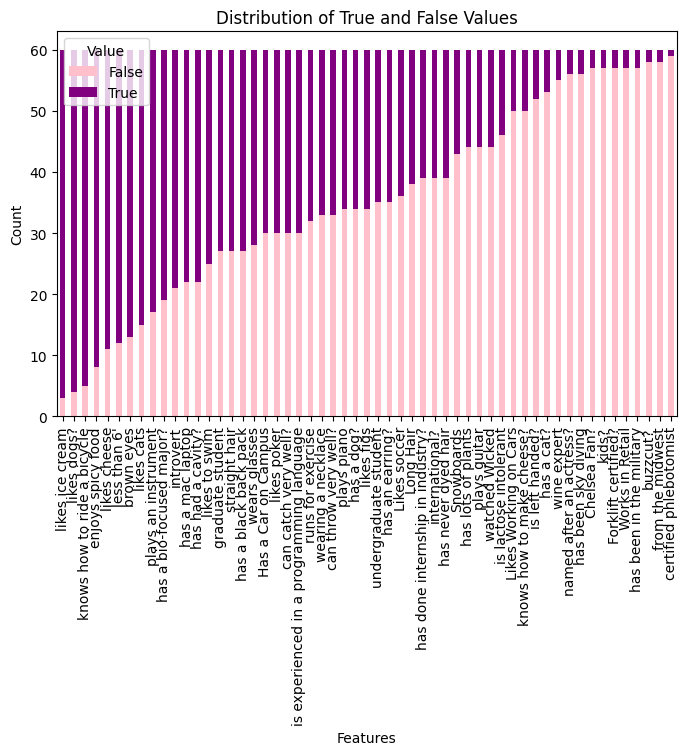

In [ ]:

#create a dataframe where 0/1's are stored as boolean
df_boolean = df_binary
df_boolean[binary_cols] = df_binary[binary_cols].astype(bool)
#df_boolean

#for just the boolean features, check the distribution of the class
df_boolean = df_boolean.select_dtypes(include='bool')
#df_boolean.head()
distribution = df_boolean.apply(pd.value_counts).fillna(0).astype(int)
sorted_distribution = distribution.sort_values(by=False, axis=1, ascending=True)

#plot results
sorted_distribution.T.plot(kind='bar', stacked=True, color=['pink', 'purple'], figsize=(8, 5))
plt.title('Distribution of True and False Values')
plt.xlabel('Features')
plt.ylabel('Count')
plt.legend(title='Value', labels=['False', 'True'])
plt.show()

### Filter for true/false: Keep only people who answered yes to 'brown eyes'

In [ ]:
filtered_for_browneyes = df_transposed[df_transposed['brown eyes'] == 1]
print(filtered_for_browneyes.index)

Index(['Adrian_Jinich', 'Nate_Roethler', 'Rocky', 'Julia', 'Derek', 'Ariel',
       'Christie', 'Katharine', 'Josh', 'Ryan', 'Nathan', 'Abhijit', 'Shivali',
       'Demi', 'Clare', 'Javier', 'Santino', 'Shay', 'Tristan', 'Sarah',
       'Francisco', 'Audrey', 'Colleen', 'Jesse', 'Sarah Lin', 'Jazlyn', 'Amy',
       'Doug', 'Andrea', 'Esther', 'Zoe', 'Merchel', 'Woojung', 'Srikar',
       'Ali', 'Soumya', 'Alma', 'Jiaqi', 'Adesh', 'Juan', 'Shirley', 'Megha',
       'Felipe', 'Aaryan', 'Thompson', 'Miranda', 'Diana'],
      dtype='object')


### out of the people with brown eyes, how many of them have more than 2 siblings?

In [ ]:
browneyes_2siblings = filtered_for_browneyes[filtered_for_browneyes['number of siblings'] > 2]
print(browneyes_2siblings.index)

Index(['Christie', 'Javier', 'Santino', 'Jesse', 'Diana'], dtype='object')


### out of these people, whose favorite ice cream flavor is dulce de leche?

In [ ]:
browneyes_2siblings_chocolate = browneyes_2siblings[browneyes_2siblings['favorite ice cream flavor'] == 'dulce de leche']
print(browneyes_2siblings_chocolate.index)

Index(['Javier'], dtype='object')


In [ ]:
#More filtering determine who has glasses and who doesnt
students = list(df_transposed.index)
random_name = random.choice(students)
question = "wears glasses"
#find names where 'question' is false
names_not_wearing_glasses = [index for index, value in df_transposed[question].items() if not value]
print(names_not_wearing_glasses)
#find names where question is true
names_wearing_glasses = [index for index, value in df_transposed[question].items() if value]
print(names_wearing_glasses)

['Nate_Roethler', 'Rocky', 'Julia', 'Derek', 'Ariel', 'Sierra', 'Christie', 'Josh', 'Nathan', 'Abhijit', 'Luka', 'Clare', 'Shay', 'Tristan', 'Colleen', 'Nick', 'Andrea', 'Esther', 'Woojung', 'Srikar', 'Ali', 'Soumya', 'Alma', 'Jiaqi', 'Adesh', 'Megha', 'Diana', 'Caxton']
['Adrian_Jinich', 'Karry', 'Katharine', 'Ryan', 'Josh Lim', 'Shivali', 'Mohit', 'Luis', 'Demi', 'Javier', 'Santino', 'Anna', 'Sarah', 'Davis', 'Francisco', 'Audrey', 'Jesse', 'Sarah Lin', 'Jazlyn', 'Amy', 'Doug', 'Zoe', 'Merchel', 'Eugene', 'Leyi', 'Juan', 'Shirley', 'Felipe', 'Aaryan', 'Joshua R', 'Thompson', 'Miranda']


## [EXERCISE] Putting it all together: The Guess Who Game!!!

### First I'm defining some functions I want to use during the game to streamline my code

In [ ]:
path_to_data = 'CHEM_269/Guess_Who_Features.xlsx'
# define functions

def select_student(data):
  '''
  Select a random player from the database for your opponent to guess
  '''
  students = list(data.index)
  random_name = random.choice(students)
  return random_name

def get_available_students(data):
  '''
  print the current students available to guess from
  '''
  students = data.index
  return students

def get_available_features(data):
  '''
  print the current available features to guess from
  '''
  features = data.iloc[0,:].tolist()
  return features


def calculate_entropy(series):
  '''
  Function to calculate entropy of all features
  '''
  # Calculate probabilities of 0 and 1
  probabilities = series.value_counts(normalize=True)
  # Compute entropy
  entropy = -np.sum(probabilities * np.log2(probabilities + 1e-10))  # Add a small value to avoid log(0)
  #entropy = series.apply(entropy).sort_values(ascending=False)
  return entropy


# Function to calculate and display entropies
def calculate_and_display_entropies(df_game):
    '''
    calculates and prints entropies for the current game df
    '''
    entropies = df_game.apply(calculate_entropy).sort_values(ascending=False)
    print("\nTop features by entropy:")
    print(entropies.head(15))
    return entropies

# Function to make a guess and update the DataFrame
def make_guess(df_game, feature, value):
    '''
    filters the game dataframe based on the guessed feature and value.
    Parameters:
    - df_game: current game dataframe
    - feature: feature (column name) guessed
    - value: guessed value (0 or 1)
    '''
    # Filter the DataFrame
    df_game = df_game[df_game[feature] == value]

    # Recalculate entropies for remaining features
    entropies = calculate_and_display_entropies(df_game)
    return df_game, entropies


# First, I will do just go through the steps of the game, without trying to loop my code or anything like that, just to get an idea.
# STEP 1: choose a random student for your opponent to guess!

In [ ]:
#STEP 0.5: define dataframe that we will work with that will be updated:
df_game = df_binary.copy()
#STEP 1: choose student for opponent to guess:
student = select_student(df_game)
print(student)
#print out all students feature if you want
#print(df_game.loc[student,:])

Amy


# STEP 2: Plot distribution of data to look at which features split the data 50/50

<ipython-input-75-0c1a33829f2b>:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  distribution = df_game.apply(pd.value_counts).fillna(0).astype(int)


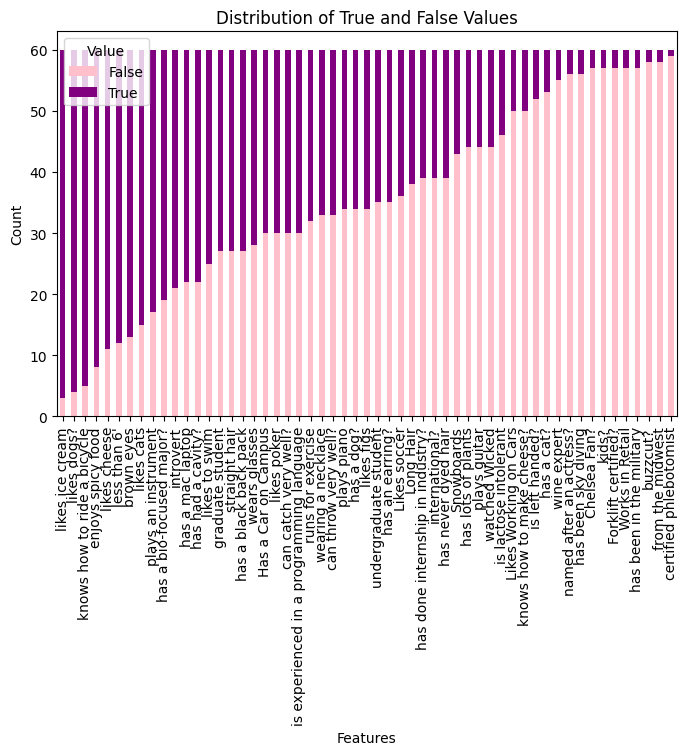

In [ ]:
#STEP3: your turn: guess a feature
# print pool of students and features available to pick from. in the beginning this will be everyone, but after every turn discard the student you have guessed.
distribution = df_game.apply(pd.value_counts).fillna(0).astype(int)
sorted_distribution = distribution.sort_values(by=False, axis=1, ascending=True)

#plot results
sorted_distribution.T.plot(kind='bar', stacked=True, color=['pink', 'purple'], figsize=(8, 5))
plt.title('Distribution of True and False Values')
plt.xlabel('Features')
plt.ylabel('Count')
plt.legend(title='Value', labels=['False', 'True'])
plt.show()

# STEP 3: calculate entropies of the features to quantitatively know which features most effectively split the data 50/50

In [ ]:
#calculate entropies using defined function above and sort them from largest to smallest
entropies = df_game.apply(calculate_entropy).sort_values(ascending=False)
print(entropies.head(15))

Feature
likes cheese                        0.918296
Works in Retail                     0.918296
plays an instrument                 0.918296
has lots of plants                  0.918296
has an earring?                     0.918296
named after an actress?             0.918296
has done internship in industry?    0.918296
knows how to make cheese?           0.918296
likes figs                          0.918296
has a dog?                          0.918296
has a cat?                          0.918296
Forklift certified?                 0.918296
has had a cavity?                   0.918296
has a black back pack               0.918296
has been sky diving                 0.918296
dtype: float64


# STEP 4: tell your opponent your feature guess, and record the answer by updating your dataframe
##### For example:
##### I guess "can catch very well" == 1
##### And response is == 1
##### Update the game dataframe to only have students whose answer satisfies your guess.
##### Keep doing this until you narrow down to two students and then guess which one it is!

In [ ]:
#update game dataframe to only include students (rows) who have the feature you guessed
df_game = df_game[df_game['likes cheese'] == 0]

In [ ]:
#print the updated dataframe to see how your guess narrowed things down
df_game

Feature,wears glasses,runs for exercise,likes ice cream,brown eyes,undergraduate student,graduate student,less than 6',has a mac laptop,introvert,can catch very well?,...,enjoys spicy food,plays guitar,plays piano,wine expert,certified phlebotomist,straight hair,international?,is left handed?,has never dyed hair,has been in the military
Audrey,True,False,True,True,False,True,True,True,True,False,...,True,False,True,False,False,True,False,False,False,False


# STEP 5: get the answer to your opponents question

In [ ]:
# get the answer to your opponenets question
df_binary.loc['Amy','is experienced in a programming language']

True

In [ ]:
df_binary.loc['Amy']

,Amy
Feature,
wears glasses,True
runs for exercise,False
likes ice cream,True
brown eyes,True
undergraduate student,True
graduate student,False
less than 6',True
has a mac laptop,True
introvert,True


# Make a streamlined version of guess who that automatically updates the dataframe and calculates entropy until you find the person!

In [ ]:
# STEP 0.5: Initialize the game DataFrame
df_game = df_binary.copy()

# STEP 1: Choose a student for the opponent to guess
student = select_student(df_game)
print(f"Selected student: {student}")

# STEP 2: Calculate and print initial entropies to make your first guess
entropies = calculate_and_display_entropies(df_game)

Selected student: Srikar

Top features by entropy:
Feature
can catch very well?                        1.000000
is experienced in a programming language    1.000000
likes poker                                 1.000000
Has a Car on Campus                         1.000000
wears glasses                               0.996792
runs for exercise                           0.996792
has a black back pack                       0.992774
wearing a necklace                          0.992774
can throw very well?                        0.992774
straight hair                               0.992774
graduate student                            0.992774
has a dog?                                  0.987138
likes figs                                  0.987138
plays piano                                 0.987138
has an earring?                             0.979869
dtype: float64


In [ ]:
# Loop the game!
while len(df_game) > 1:
    print(f"\nRemaining students: {len(df_game)}")

    # Enter your guess
    feature = input("Enter the feature to guess: ")
    value = int(input(f"Enter the value for '{feature}' (0 or 1): "))

    # Update the game DataFrame based on the guess
    df_game, entropies = make_guess(df_game, feature, value)

    # Check if the game is over
    if len(df_game) == 1:
        print("\nCongratulations! The guessed student is:")
        print(df_game)
        break
    elif len(df_game) == 0:
        print("\nNo students match your criteria. Check your guesses!")
        break


Remaining students: 60
Enter the feature to guess: Has a Car on Campus
Enter the value for 'Has a Car on Campus' (0 or 1): 1

Top features by entropy:
Feature
likes poker                                 1.000000
can catch very well?                        1.000000
has an earring?                             0.996792
Long Hair                                   0.996792
Likes soccer                                0.996792
runs for exercise                           0.996792
has a dog?                                  0.996792
likes figs                                  0.996792
straight hair                               0.996792
has a black back pack                       0.996792
plays piano                                 0.996792
is experienced in a programming language    0.987138
wearing a necklace                          0.987138
wears glasses                               0.987138
likes to swim                               0.987138
dtype: float64

Remaining students: 30


KeyboardInterrupt: Interrupted by user